<a href="https://colab.research.google.com/github/Justsecret123/One-Piece-Image-Classifier/blob/master/Model_without_Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import IPython

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

import pathlib 
import zipfile

# Files

## Dataset download

In [2]:
data_path = 'drive/My Drive/Data.zip'
zip_ref = zipfile.ZipFile(data_path,'r')
zip_ref.extractall('/tmp/')

In [3]:
data_dir = pathlib.PosixPath('/tmp/Data')

## Images count

In [4]:
image_count = len(list(data_dir.glob("*/*")))
print(image_count)

4585


# Display some images

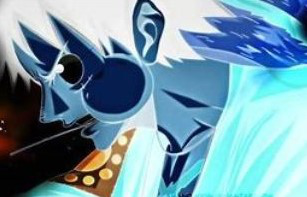

In [5]:
Luffy = list(data_dir.glob('Luffy/*'))
PIL.Image.open(str(Luffy[0]))

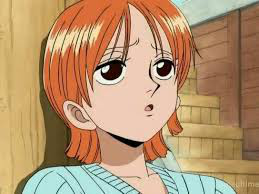

In [6]:
Nami = list(data_dir.glob('Nami/*'))
PIL.Image.open(str(Nami[0]))

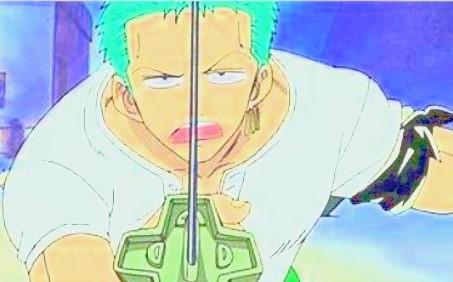

In [7]:
Zoro = list(data_dir.glob('Zoro/*'))
PIL.Image.open(str(Zoro[0]))

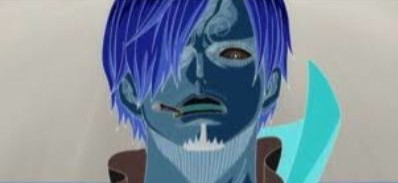

In [8]:
Sanji = list(data_dir.glob('Sanji/*'))
PIL.Image.open(str(Sanji[0]))

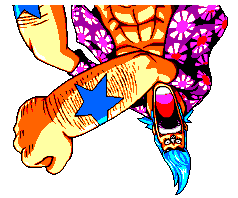

In [9]:
Franky = list(data_dir.glob('Franky/*'))
PIL.Image.open(str(Franky[0]))

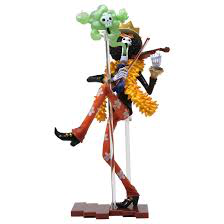

In [10]:
Brook = list(data_dir.glob('Brook/*'))
PIL.Image.open(str(Brook[0]))

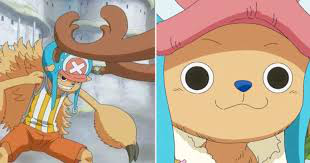

In [11]:
Chopper = list(data_dir.glob('Chopper/*'))
PIL.Image.open(str(Chopper[0]))

# Model builder

## Some parameters 

In [12]:
import random

In [13]:
random.seed(123)
seed = random.randint(0,100)

In [14]:
batch_size = 5
width = 180
height = 180

## Training dataset definition

In [15]:
train_dataset = preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(height,width),
    batch_size=batch_size
)

Found 4585 files belonging to 7 classes.
Using 3668 files for training.


In [16]:
classes_count = len(train_dataset.class_names)
class_names = train_dataset.class_names
print(class_names)

['Brook', 'Chopper', 'Franky', 'Luffy', 'Nami', 'Sanji', 'Zoro']


## Validation dataset definition

In [17]:
val_dataset = preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)

Found 4585 files belonging to 7 classes.
Using 917 files for validation.


# Data augmentation

In [18]:
data_augmentation = Sequential(layers=[
                                tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(height,width,3)),
                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                tf.keras.layers.experimental.preprocessing.RandomZoom(0.1), 
                    ], name="data_augmentation")

# Model builder

## Description

*   5 Convolutional layers followed by a batch normalization layer, then a MaxPooling layer followed by a batch normalization layer  
*   A flatten layer 
*   A dense layer with 480 units
*   An dense layer (sigmoid) which represents the final output: Probability of input(X) belonging to each class

Based on Sergey Ioffe and Christian Szegedy "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift" research paper, there is no need to add a dropout layer since we've used a batch normalization layer. 





In [19]:
def model_builder():

    model = Sequential()

    model.add(data_augmentation)
    
    model.add(layers.Conv2D(filters=15, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=60, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=90, kernel_size=3, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=120, kernel_size=3, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units=480, activation='relu',kernel_regularizer=regularizers.l2(1e-5)))
    model.add(layers.Dense(classes_count, activation='sigmoid',name='final_output'))

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Model fit

In [20]:
model = model_builder()

### Use early stopping to stop the training process if the validation accuracy stops increasing after 6 epochs, and restore the weights which minimize the validation accuracy

In [21]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=15, mode ="max", verbose=2, restore_best_weights=True)

In [22]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    verbose=1, 
    callbacks = [stop_early]
)

Epoch 1/100
734/734 [==============================] - 52s 28ms/step - loss: 2.3970 - accuracy: 0.2985 - val_loss: 2.0878 - val_accuracy: 0.3250
Epoch 2/100
734/734 [==============================] - 22s 30ms/step - loss: 1.6039 - accuracy: 0.4160 - val_loss: 1.8556 - val_accuracy: 0.3904
Epoch 3/100
734/734 [==============================] - 22s 30ms/step - loss: 1.4709 - accuracy: 0.4686 - val_loss: 1.7952 - val_accuracy: 0.4275
Epoch 4/100
734/734 [==============================] - 21s 28ms/step - loss: 1.3547 - accuracy: 0.5085 - val_loss: 1.3174 - val_accuracy: 0.5398
Epoch 5/100
734/734 [==============================] - 21s 29ms/step - loss: 1.2756 - accuracy: 0.5477 - val_loss: 2.0731 - val_accuracy: 0.3795
Epoch 6/100
734/734 [==============================] - 23s 31ms/step - loss: 1.2234 - accuracy: 0.5709 - val_loss: 1.2766 - val_accuracy: 0.6063
Epoch 7/100
734/734 [==============================] - 22s 30ms/step - loss: 1.1531 - accuracy: 0.6017 - val_loss: 1.0787 - val_ac

# Plotting the training results

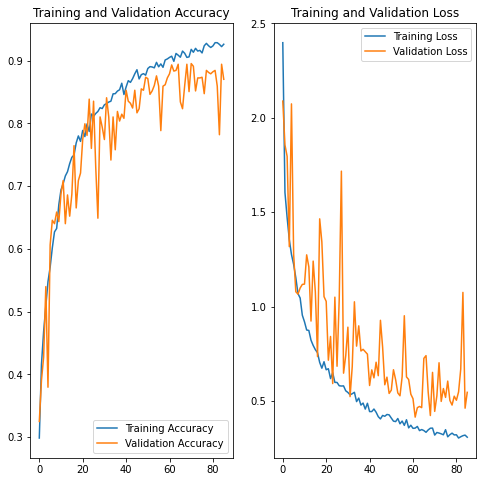

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history["loss"]))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model summary 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_augmentation (Sequentia (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 15)      420       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 15)      60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 15)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 89, 89, 15)        60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 30)        4080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 87, 87, 30)        1

# Predictions

In [25]:
from google.colab import files
from keras.preprocessing import image

In [26]:
class_names = train_dataset.class_names
class_names

['Brook', 'Chopper', 'Franky', 'Luffy', 'Nami', 'Sanji', 'Zoro']

In [27]:
def prediction(): 
  for filename in uploaded.keys():

    path = "/content/" + filename
    im = image.load_img(path,target_size=(180,180))
    
    inputs = image.img_to_array(im)

    inputs = np.vstack([inputs])

    inputs = tf.expand_dims(inputs,axis=0) #Creates a batch

    
    score = model.predict(inputs) #Make a prediction based on input values
    score = np.squeeze(score)
    print("Image: ", path)
    for i in range (len(score)):
      print("\nProbability of being " + class_names[i] + \
              ": ", 100*score[i] , "%")

    object_score = np.max(score)  #np.argmax(score) :  returns the index with the highest score 
    object_class = class_names[np.argmax(score)]  #np.max(score) returns the highest probability of our input belonging to one of our classes
    

    plt.figure()
    plt.title("This image most likely belongs to " + str(object_class)+ \
              " category with a " + str(object_score) + " score.\n\n")
    
    plt.imshow(im)


    print("This image most likely belongs to " +str(object_class)+ \
          " category with a " + str(object_score) + " score. \n\n"
    )

In [32]:
uploaded = files.upload() 

Saving Brook test.jfif to Brook test (1).jfif
Saving Chopper test.jfif to Chopper test (1).jfif
Saving Franky test.jfif to Franky test (1).jfif
Saving Luffy test.png to Luffy test (1).png
Saving Nami test.jpg to Nami test (1).jpg
Saving Sanji test.jpg to Sanji test (1).jpg
Saving Zoro test.jpg to Zoro test (1).jpg


Image:  /content/Brook test.jfif

Probability of being Brook:  43.04679334163666 %

Probability of being Chopper:  0.00012138274314565933 %

Probability of being Franky:  0.0006578608463314595 %

Probability of being Luffy:  0.003622720032581128 %

Probability of being Nami:  18.59026998281479 %

Probability of being Sanji:  7.969937487750656e-08 %

Probability of being Zoro:  0.43323575519025326 %
This image most likely belongs to Brook category with a 0.43046793 score. 


Image:  /content/Chopper test.jfif

Probability of being Brook:  0.03408440388739109 %

Probability of being Chopper:  38.54188024997711 %

Probability of being Franky:  0.02114465896738693 %

Probability of being Luffy:  8.056695759296417 %

Probability of being Nami:  0.009559495811117813 %

Probability of being Sanji:  0.001238173990714131 %

Probability of being Zoro:  0.010990611190209165 %
This image most likely belongs to Chopper category with a 0.3854188 score. 


Image:  /content/Franky test.jfif

Probabili

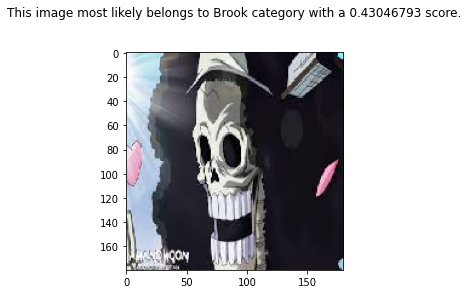

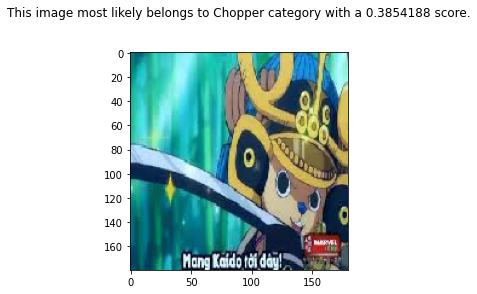

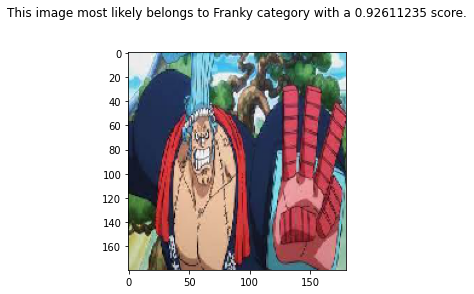

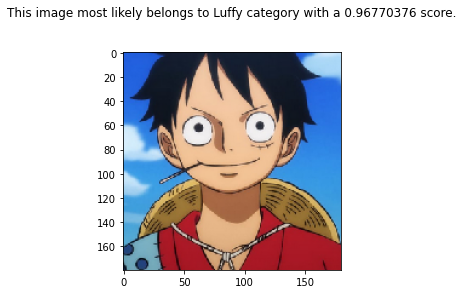

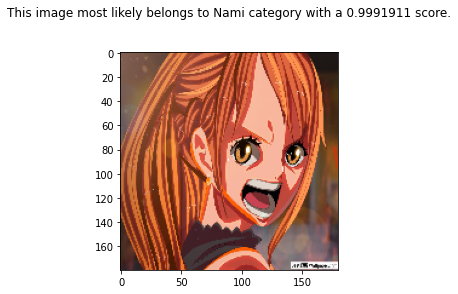

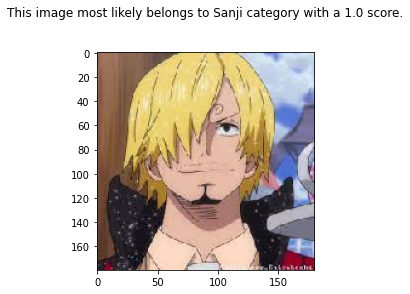

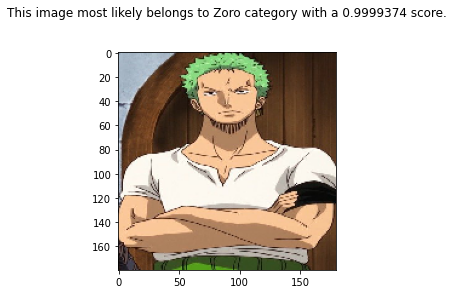

In [33]:
prediction()

# Save the model 

## Saved model format

In [30]:
model.save('drive/My Drive/One_Piece_Image_Classifier_Model_v7')

INFO:tensorflow:Assets written to: drive/My Drive/One_Piece_Image_Classifier_Model_v7/assets


## h5 format

In [34]:
model.save('drive/My Drive/One_Piece_Image_Classifier_Model_v7.h5')

In [31]:
model.evaluate(x=val_dataset, return_dict=True)

184/184 [==============================] - 3s 13ms/step - loss: 0.4452 - accuracy: 0.8953


{'accuracy': 0.8953108191490173, 'loss': 0.44515612721443176}